In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.shape

(17000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df.describe()

In [ ]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
X = df.drop(columns=['median_house_value'])
Y = df['median_house_value']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

<Axes: >

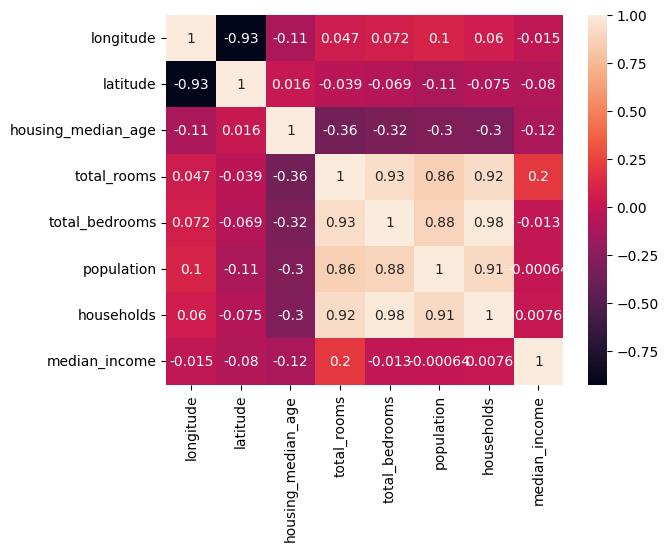

In [ ]:
sns.heatmap(X.corr(), annot=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

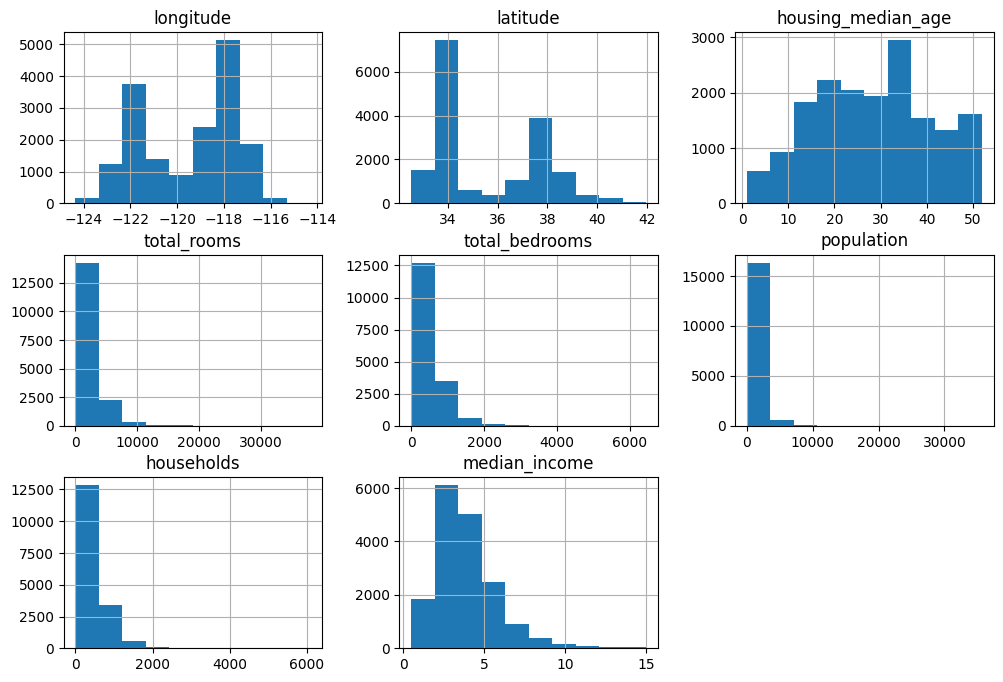

In [ ]:
X.hist(figsize=(12,8))

<Axes: xlabel='latitude', ylabel='longitude'>

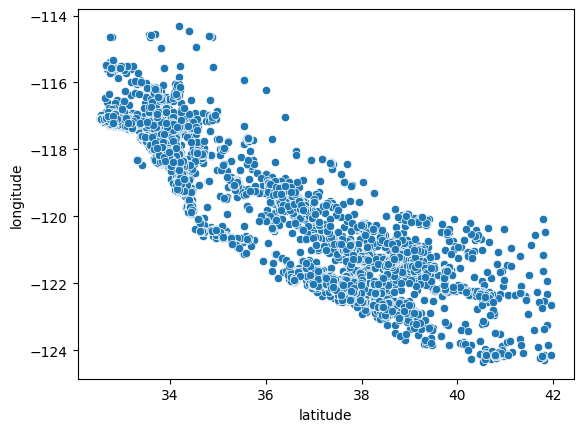

In [ ]:
sns.scatterplot(x=x_train['latitude'],y=x_train['longitude'])

<Axes: xlabel='total_bedrooms', ylabel='population'>

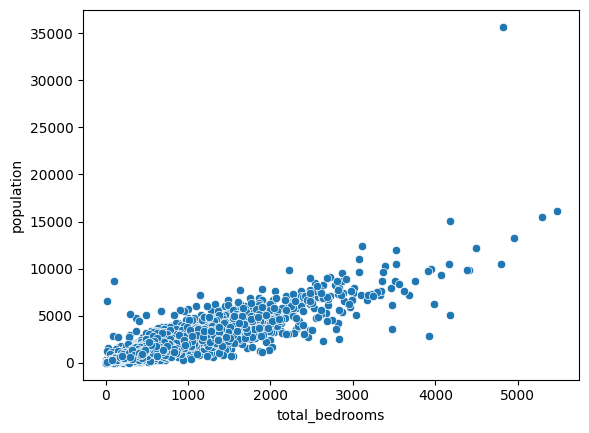

In [ ]:
sns.scatterplot(x=x_train['total_bedrooms'],y=x_train['population'])

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(lr.score(x_test,y_test))

0.6455178037405078


In [ ]:
X['rooms_per_person'] = X['total_rooms'] / X['population']
X['room_by_income'] = X['total_rooms'] / X['median_income']
X['income_per_person'] = X['median_income'] / X['population']
X['people_per_household'] = X['population'] / X['households']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.8)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train = pd.DataFrame(x_train,columns=X.columns)
x_test = pd.DataFrame(x_test,columns=X.columns)

In [ ]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person,room_by_income,income_per_person,people_per_household
0,1.262844,-1.433998,0.371868,-0.942289,-0.896150,-0.877694,-0.881446,-1.071114,-0.562203,-0.686598,-0.043662,-0.373975
1,-1.574198,1.312278,-0.825435,1.014367,0.888544,1.111237,0.877707,-0.072337,-0.225702,0.816581,-0.163707,0.274834
2,-0.991858,1.602344,-0.186873,-0.578227,-0.794774,-0.701373,-0.748925,0.173026,0.355903,-0.692291,0.049377,-0.051513
3,-1.504516,1.204672,-1.543816,0.979584,0.648070,0.533723,0.654240,0.654698,0.419377,0.243855,-0.119516,-0.201521
4,-1.315380,1.017533,0.132408,-0.550401,-0.240741,-0.501202,-0.203249,-1.104558,-0.294030,0.081586,-0.135868,-0.857473


In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(lr.score(x_test,y_test))

0.6102859212643414


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train, y_train)
print(model.score(x_test,y_test))

0.5302311429491877


In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(x_train, y_train)
print(model.score(x_test,y_test))

0.7872037916378891


In [ ]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(x_train, y_train)
print(model.score(x_test,y_test))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2857
[LightGBM] [Info] Number of data points in the train set: 3400, number of used features: 12
[LightGBM] [Info] Start training from score 207237.903824
0.8046530904480245


In [ ]:
!pip install -q catboost
from catboost import CatBoostRegressor
model = CatBoostRegressor()
model.fit(x_train, y_train, verbose=False)
print(model.score(x_test,y_test))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.7 MB/s eta 0:00:00
0.8226481178142713
